In [12]:
import os
import pandas as pd
from IPython.display import display
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]
import pickle 

from MyTransformers import *
from sklearn.model_selection import train_test_split
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

#%config Completer.use_jedi = False
%matplotlib inline  

f_data_path = "PrepedData/"
f_modele_path = 'Model/'

f_HHData = f_data_path + 'HHDataId/'
mode_path = "Models/"

In [74]:
data = pd.read_feather(f_data_path + "LPG-Profile-0.feather")
data = data['energy'].values
data = np.sum(data.reshape(-1,120),axis=1)

In [75]:
trainLen = len(data)-200
predLen = 56
train = data[:trainLen]
test = data[trainLen:trainLen+predLen]

## Seasonal

In [94]:
model = ExponentialSmoothing(train,seasonal='mul',seasonal_periods=12*7).fit()
pred = model.predict(start=trainLen,end=trainLen+predLen-1).reshape(-1,1)

In [97]:
model = ExponentialSmoothing(
    train,
    seasonal_periods=12*7,
    seasonal="mul",
    use_boxcox=False,
    initialization_method="estimated",
).fit()
pred = model.predict(start=trainLen,end=trainLen+predLen-1).reshape(-1,1)

## Simple

In [79]:
model = SimpleExpSmoothing(train).fit()
pred = model.predict(start=trainLen,end=trainLen+predLen-1).reshape(-1,1)

## Test

In [98]:
mean_squared_error(test,pred), mean_absolute_percentage_error(test,pred)

(0.3790668943380835, 0.6725546791540957)

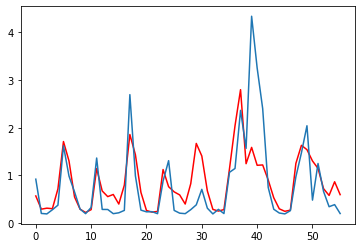

In [96]:
plt.plot(pred,'r')
plt.plot(test)